<a href="https://colab.research.google.com/github/Sparshj8287/Cyclonet/blob/master/Cyclone_Project_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import json

# Create .kaggle directory in your user profile
kaggle_path = os.path.join(os.environ['USERPROFILE'], '.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# Kaggle API token (Replace with your actual values)
api_token = {
    "username": "sparshjain8287",
    "key": "ec7b20617be61dd75d5c92c221b97e06"
}

# Write the kaggle.json file
with open(os.path.join(kaggle_path, 'kaggle.json'), 'w') as file:
    json.dump(api_token, file)

print("✅ kaggle.json created at:", kaggle_path)


✅ kaggle.json created at: C:\Users\Srinivasrathod\.kaggle


In [3]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sparshjain8287","key":"ec7b20617be61dd75d5c92c221b97e06"}

import json

with open('C:/Users/Srinivasrathod/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!kaggle datasets download -d sshubam/insat3d-infrared-raw-cyclone-images-20132021 --force

Dataset URL: https://www.kaggle.com/datasets/sshubam/insat3d-infrared-raw-cyclone-images-20132021


  0%|          | 0.00/43.2M [00:00<?, ?B/s]
 30%|███       | 13.0M/43.2M [00:00<00:00, 135MB/s]
100%|██████████| 43.2M/43.2M [00:00<00:00, 302MB/s]



License(s): CC0-1.0



In [5]:
import zipfile
import os

zip_path = r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d-infrared-raw-cyclone-images-20132021.zip"
extract_to = r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipped successfully!")


Unzipped successfully!


##First we visualise the data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv(r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [7]:
import os

# Use your actual extracted dataset path here
data_path = r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds"

# Walk through the dataset directory
for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 1 directories and 0 images in 'C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds'.
There are 0 directories and 136 images in 'C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED'.


In [8]:
import os

if not os.path.exists("test_data"):
    os.mkdir("test_data")
    print("Directory 'test_data' created.")
else:
    print("Directory 'test_data' already exists.")


Directory 'test_data' already exists.


In [9]:
import os
import shutil

# Use raw strings (prefix with r) or double backslashes to avoid escape issues
source = r'C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED'
destination = r'C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\test_data'

# Check if source exists
if not os.path.exists(source):
    print(f"Source path not found: {source}")
else:
    allfiles = os.listdir(source)
    for f in allfiles[133:]:
        src_path = os.path.join(source, f)
        dst_path = os.path.join(destination, f)
        shutil.move(src_path, dst_path)
    print("Files moved successfully.")


Files moved successfully.


In [10]:
#Get the classes drammatically
import pathlib

# Use a raw string to avoid escape issues with backslashes
data_dir = pathlib.Path(r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds")
print(data_dir)


C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds


In [11]:
#Let visualise our images 
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir):
    random_images = random.sample(os.listdir(target_dir), 10)
    plt.figure(figsize=(10, 10))

    for i in range(10):
        img_path = os.path.join(target_dir, random_images[i])  # safer than string concat
        img = mpimg.imread(img_path)

        plt.subplot(5, 2, i + 1)
        plt.imshow(img)
        plt.title(random_images[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()


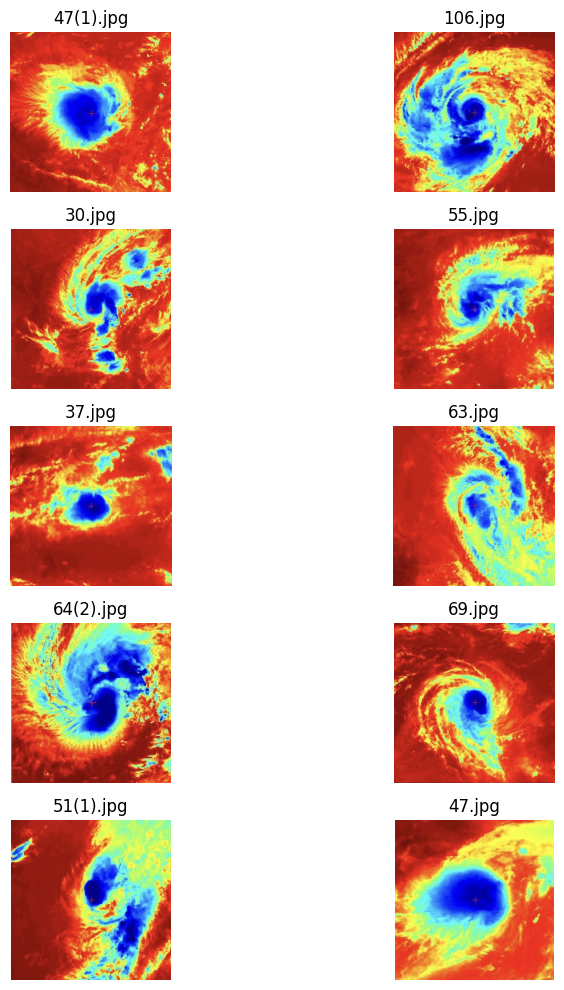

In [12]:
view_random_image(r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED")


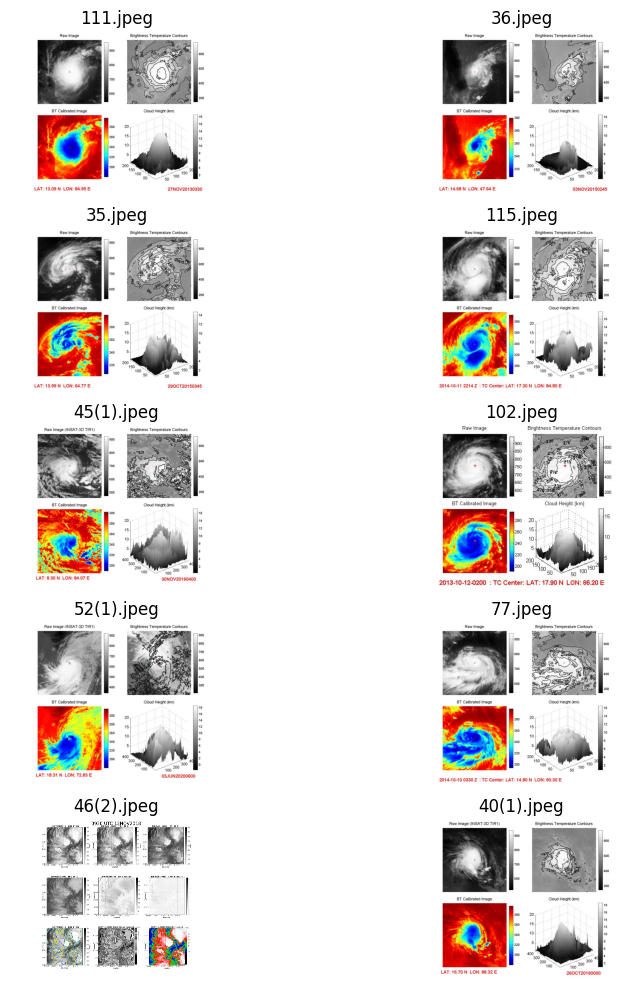

In [13]:
view_random_image(r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_for_reference_ds\CYCLONE_DATASET")



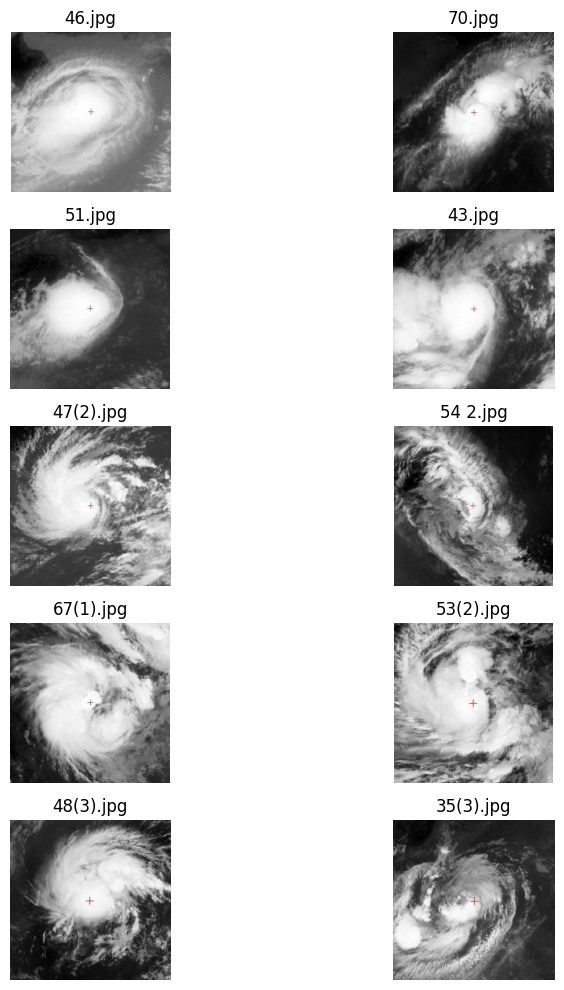

In [14]:
view_random_image(r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_raw_cyclone_ds\CYCLONE_DATASET_FINAL")

#Preprocess the data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv(r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat_3d_ds - Sheet.csv")

In [16]:
train_dir = r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED"
#print(os.listdir(train_dir)[:10])  
train_datagen=ImageDataGenerator(rescale=1./255)
#print(len(train_datagen))
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=8,
                                             class_mode="raw"
                                             )
print('length',len(train_data))


Found 133 validated image filenames.
length 17


C:\Users\Srinivasrathod\AppData\Roaming\Python\Python39\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


#Create a model

In [17]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
inputs=Input(shape=(256,256,3))
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
model_2=Model(inputs=inputs,outputs=outputs)

In [ ]:
model_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 256, 256, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 256, 256, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             

 Total params: 1,778,961 (6.79 MB)

 Trainable params: 1,776,497 (6.78 MB)

 Non-trainable params: 2,464 (9.62 KB)

In [19]:
model_2.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                metrics=["mse"])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10, mode='min')

In [20]:
history_1=model_2.fit(train_data,
                      epochs=30,callbacks=[early_stopping])

Epoch 1/30


C:\Users\Srinivasrathod\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 330s 19s/step - loss: 3469.9573 - mse: 2980.7012
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 309s 18s/step - loss: 1178.1102 - mse: 673.3356
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 346s 20s/step - loss: 770.0956 - mse: 263.1970
Epoch 4/30
 6/17 ━━━━━━━━━━━━━━━━━━━━ 3:51 21s/step - loss: 789.3218 - mse: 284.6636

KeyboardInterrupt: 

In [ ]:
model_2.save('new_model2.keras') # Save the model again

In [20]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

NameError: name 'history_1' is not defined

In [70]:
def load_and_prep_image(filename, img_shape=256):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [71]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred*1.857}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


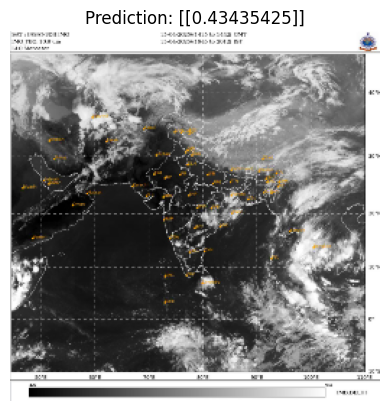

In [72]:
pred_and_plot(model_2,r"C:\Users\Srinivasrathod\Pictures\Screenshots\Screenshot 2025-04-15 210044.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


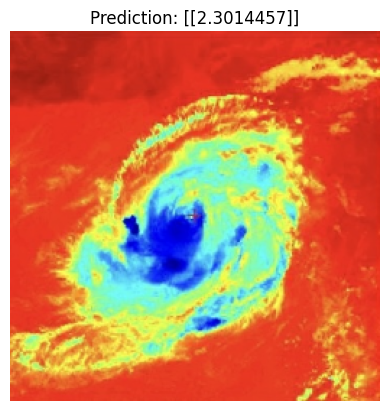

In [73]:
pred_and_plot(model_2,r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\test_data\94.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


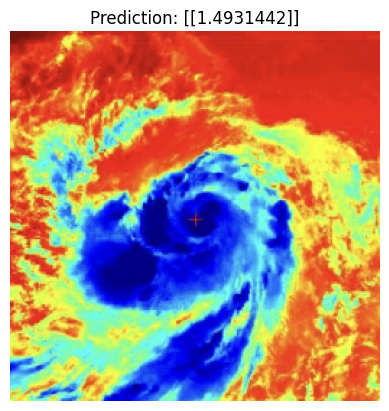

In [74]:
pred_and_plot(model_2,r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\test_data\98.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


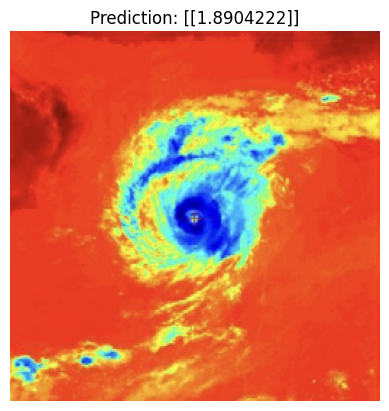

In [75]:
pred_and_plot(model_2,r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\test_data\99.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


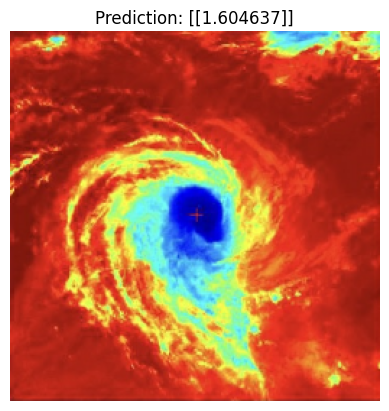

In [76]:
pred_and_plot(model_2,r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED\69.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


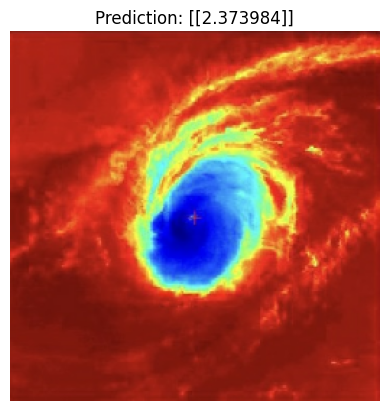

In [77]:
pred_and_plot(model_2,r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED\85(2).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


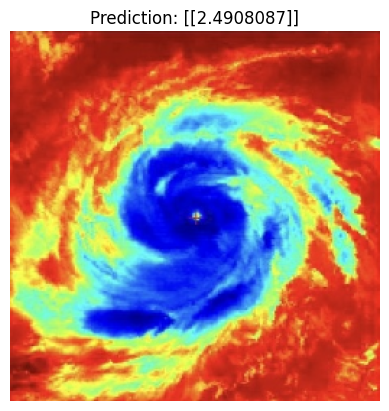

In [78]:
pred_and_plot(model_2,r"C:\Users\Srinivasrathod\Desktop\Projects\Cyclonet-master-main\Cyclonet-master-main\Cyclonet-master-main\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED\101.jpg")

In [79]:
import pickle
filename= "Trained_model.sav"
a=open(filename,'wb')
pickle.dump(model_2,a)
a.flush()
a.close()


In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>